In [439]:
# Uncomment and run these lines if working in a Colab or fresh environment
# !pip install torch torchvision
# !pip install tensorflow

# MNIST Digit Classification — Data Exploration

Welcome! In this notebook, we’ll dive deep into the classic MNIST dataset and build an end-to-end model to classify handwritten digits. Let's begin with the essentials.

In [440]:
import numpy as np
import matplotlib.pyplot as plt

# We use TensorFlow only to load the MNIST dataset conveniently as NumPy arrays
from tensorflow.keras.datasets import mnist

## Step 2: Load the raw MNIST dataset

The dataset comes pre-split: 60,000 training images and 10,000 for testing. Each image is 28×28 pixels, grayscale.

In [441]:
# Load MNIST dataset — returns NumPy arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Step 3: Understand dataset shapes

Before training a model, let’s inspect the shapes of our training and testing data.

In [442]:
print(f"Training images: {X_train.shape}")     # (60000, 28, 28)
print(f"Training labels: {y_train.shape}")     # (60000,)
print(f"Test images: {X_test.shape}")          # (10000, 28, 28)
print(f"Test labels: {y_test.shape}")          # (10000,)

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


## Step 4: Inspect raw pixel values

Let’s take a closer look at what the raw data actually contains — pixel values from 0 to 255.

In [443]:
index = 10  # Try changing this to explore other digits

print(f"Label: {y_train[index]}")
print("Raw pixel values:")
print(X_train[index])  # 28x28 array with values in [0, 255]

Label: 3
Raw pixel values:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0

## Step 5: Visualize sample digits

Let’s visualize a few examples from the dataset to get a better sense of what our model will be learning from.

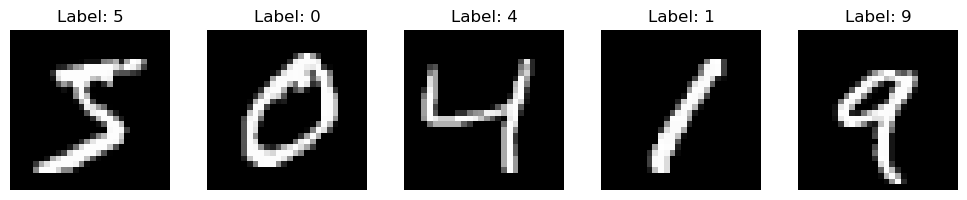

In [444]:
# Visualize the first 5 images in the training set
plt.figure(figsize=(10, 2))

for index in range(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')  # cleaner display without axis ticks

plt.tight_layout()
plt.show()

# MNIST — Preprocessing

Before feeding the data to our model, we need to flatten and normalize the images.

## Step 1 : Flatten images

In [445]:
# Reshape each 28x28 image into a 784-dimensional flat vector
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [446]:
# Equivalent to: X_train.reshape(num_samples, 28 * 28) or X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [447]:
print(f"Flattened training data shape: {X_train_flatten.shape}")  # (60000, 784)
print(f"Flattened test data shape: {X_test_flatten.shape}")      # (10000, 784)

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


## Step 2: Normalize pixel values

To speed up training and stabilize convergence, we normalize all pixel values to the [0, 1] range.

In [448]:
# Find the maximum pixel value in the dataset
max_value = np.max(X_train)
print(f"Maximum pixel value in training data: {max_value}")  # should be 255

Maximum pixel value in training data: 255


In [449]:
# Normalize pixel values to the [0, 1] range
X_train_normalized = X_train_flatten / max_value
X_test_normalized = X_test_flatten / max_value

In [450]:
# Display a slice of the first normalized image (just 100 values for readability)
print("Slice of normalized pixel values:", "\n", X_train_normalized[0][100:200])

Slice of normalized pixel values: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.07058824
 0.07058824 0.07058824 0.49411765 0.53333333 0.68627451 0.10196078
 0.65098039 1.         0.96862745 0.49803922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.14117647
 0.36862745 0.60392157 0.66666667 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.88235294 0.6745098  0.99215686 0.94901961
 0.76470588 0.25098039 0.         0.   

In [451]:
# Final input data prepared for the neural network
X_train_input = X_train_normalized
X_test_input = X_test_normalized

In [452]:
# Convert integer labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print(f"Shape of one-hot encoded training labels: {y_train_one_hot.shape}")     # (60000, 10)
print(f"Shape of one-hot encoded test labels: {y_test_one_hot.shape}")          # (10000, 10)

# Show a few examples
print("First 5 one-hot encoded training labels:")
print(y_train_one_hot[:5])

Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)
First 5 one-hot encoded training labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [453]:
# Final target labels prepared for training and testing
y_train_input = y_train_one_hot
y_test_input = y_test_one_hot

# MNIST — Building a Multi-Layer Perceptron (MLP)

We now define a simple feedforward neural network using Keras `Sequential` API. Remember, the very same model we built from scratch in the previous notebook. (Guide 1)

In [454]:
# Import necessary components from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [455]:
# Sanity check — input dimension should be (60000, 784)
X_train_input.shape

(60000, 784)

In [456]:
# Define a simple 3-layer fully connected neural network (MLP)
model = Sequential([
    Input(shape=(X_train_input.shape[1],)),  # 784 input features (28x28 images flattened)
    Dense(128, activation='relu'),           # first hidden layer (128 neurons)
    Dense(64, activation='relu'),            # second hidden layer (64 neurons)
    Dense(10, activation='softmax')          # output layer — 10 classes (10 neurons for digits 0-9)
])

In [457]:
# Compile the model with loss, optimizer and metrics
model.compile(
    loss='categorical_crossentropy',    # for multi-class classification
    optimizer='sgd',                    # Stochastic Gradient Descent
    metrics=['accuracy']                # we will track accuracy during training
)

# MNIST — Training the MLP Model

Let’s now train our model using the training data and observe how it learns over time.

In [458]:
# Final sanity check — shapes must match (samples, features)
print(f"Input shape: {X_train_input.shape}")   # should be (60000, 784)
print(f"Label shape: {y_train_input.shape}")   # should be (60000, 10)

Input shape: (60000, 784)
Label shape: (60000, 10)


In [459]:
# Train the model — keep 10% of training data for validation
history = model.fit(
    X_train_input, y_train_input,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.6876 - loss: 1.1284 - val_accuracy: 0.9143 - val_loss: 0.2969
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.9050 - loss: 0.3275 - val_accuracy: 0.9363 - val_loss: 0.2294
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.9208 - loss: 0.2741 - val_accuracy: 0.9392 - val_loss: 0.2110
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9342 - loss: 0.2286 - val_accuracy: 0.9535 - val_loss: 0.1754
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9398 - loss: 0.2062 - val_accuracy: 0.9577 - val_loss: 0.1584
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9479 - loss: 0.1806 - val_accuracy: 0.9612 - val_loss: 0.1476
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9531 - loss: 0.1640 - val_accuracy: 0.9615 - val_loss: 0.1367
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9556 -

In [460]:
# Display the available metrics tracked during training
print("Available metrics in training history:", history.history.keys())

Available metrics in training history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


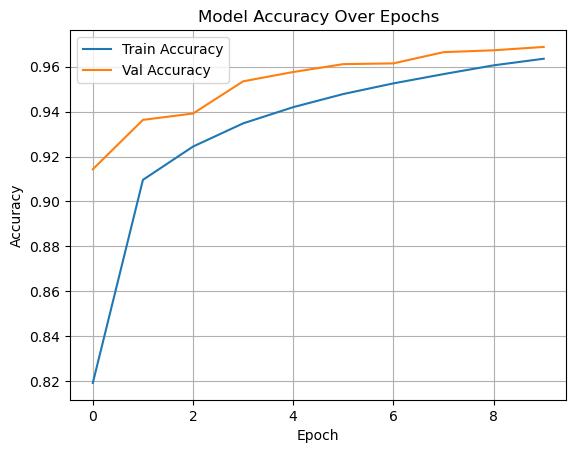

In [461]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

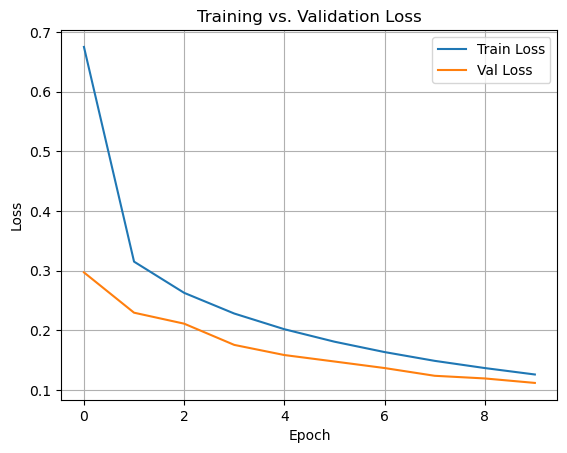

In [472]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# MNIST — Evaluation on Test Data

Let’s evaluate the trained model on the untouched test set.

In [476]:
# Evaluate model performance on the test set
test_loss, test_acc = model.evaluate(X_test_input, y_test_input, verbose=0)

**Why 313 steps during evaluation?**

Since we have 10,000 test samples and a default batch size of 32, we need ⌈10000/32⌉ = 313 steps to cover all test data.

In [478]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1296
Test Accuracy: 0.9625


# MNIST — Metrics & Error Analysis

Let’s dig deeper into how the model performs — beyond accuracy.

In [ ]:
# Get true labels
true_label = np.argmax(y_test_input, axis=1)

# Get the predicted labels :
# 1 - Predict class probabilities for the test set
predictions = model.predict(X_test_input)

# 2- Choose class with highest probability
predicted_label = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


In [481]:
# Find indices of misclassified examples
errors = np.where(true_label != predicted_label)[0]
print(f"Total misclassified images: {len(errors)}")

Total misclassified images: 375


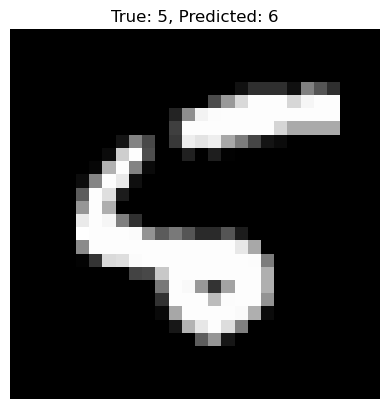

In [482]:
# Visualize one misclassified digit
error_index = errors[0]
plt.imshow(X_test[error_index], cmap='gray')
plt.title(f"True: {true_label[error_index]}, Predicted: {predicted_label[error_index]}")
plt.axis('off')
plt.show()

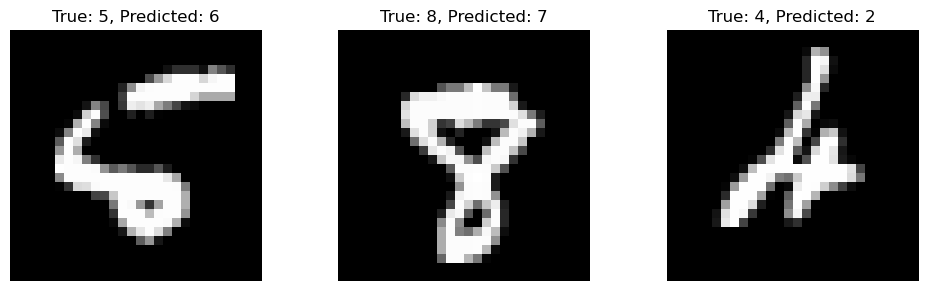

In [483]:
# Show first 3 misclassified digits
plt.figure(figsize=(10, 3))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[errors[i]], cmap='gray')
    plt.title(f"True: {true_label[errors[i]]}, Predicted: {predicted_label[errors[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [484]:
# Import tools for computing and visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

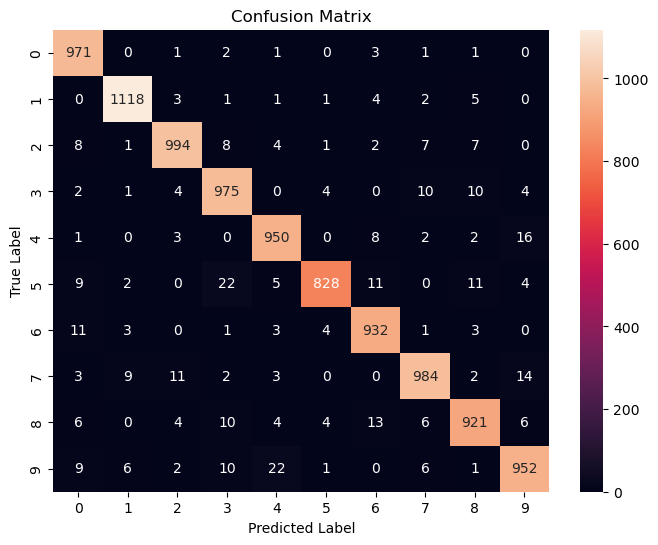

In [487]:
# Compute and display the confusion matrix
matrix = confusion_matrix(true_label, predicted_label)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()